# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
print(torch.__version__)

1.1.0


In [10]:
from torch import nn
import torch.nn.functional as F

In [38]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

tensor(8)

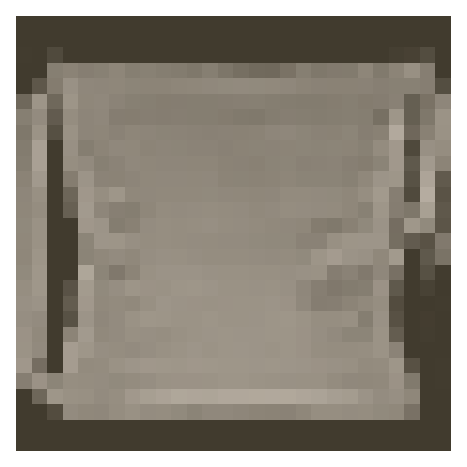

In [65]:
image, label = next(iter(trainloader))
helper.imshow(image[63,:]);
label[63]


## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [41]:
print(image.shape)
images = image.view(image.shape[0],-1)
print(images.shape)


torch.Size([64, 1, 28, 28])
torch.Size([64, 784])


In [42]:
n_input = images.shape[1]
n_hidden = [128,64]
n_output = 10

In [43]:
# TODO: Define your network architecture here
model = nn.Sequential(nn.Linear(n_input, n_hidden[0]),
                     nn.ReLU(),
                     nn.Linear(n_hidden[0],n_hidden[1]),
                     nn.ReLU(),
                     nn.Linear(n_hidden[1],n_output),
                     nn.LogSoftmax(dim=1))
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [44]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.NLLLoss()
from torch import optim
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [81]:


#Feedforwards each image from trainloader through the network
epochs = 5
for e in range(epochs):
    running_loss = 0
    for image, label in trainloader: #iter through each batch of trainloader, 64 images were test
        image = image.view(image.shape[0],-1) #resize image to 784 long vector 28x28
        optimizer.zero_grad() #clear the gradients of optimizer
        output = model.forward(image) #feedforward the input of 64 images through the model, output for each image with shape (64x10)
        loss = criterion(output,label) #loss for 64 images
        loss.backward() #backpropagate through the network to caculate the derivative of loss based on derivative of weight
        optimizer.step() #use gradient descent to update the weight for 64 images in one batch
        
        running_loss+=loss.item() #running loss is the sum of all losses in 1 epoch, loss.item() is used to obtain the Python Number from the loss tensor
    else:
        print(f"Training loss: {running_loss/len(trainloader)}") #average of the loss of each epoch, total loss/total number of batches in the trainloader



0.36268967390060425
0.18124040961265564
0.301371306180954
0.5347015857696533
0.3277345895767212
0.4435925781726837
0.15851114690303802
0.2121208906173706
0.5980154871940613
0.34809690713882446
0.36934906244277954
0.23675265908241272
0.3102513551712036
0.2070872187614441
0.40666964650154114
0.17232298851013184
0.2883104681968689
0.3557056188583374
0.3932689428329468
0.2819302976131439
0.35176175832748413
0.5826003551483154
0.3981461226940155
0.41482415795326233
0.32540780305862427
0.4629988670349121
0.41076502203941345
0.27330005168914795
0.2806664705276489
0.42148077487945557
0.19682319462299347
0.23752892017364502
0.4364161491394043
0.28045451641082764
0.3506767749786377
0.24102771282196045
0.25749579071998596
0.2912168800830841
0.3813932538032532
0.22261157631874084
0.26488250494003296
0.12168724834918976
0.37070122361183167
0.4188244342803955
0.37288087606430054
0.2771802544593811
0.25972968339920044
0.32470962405204773
0.33637064695358276
0.3341679275035858
0.22923284769058228
0.34

KeyboardInterrupt: 

In [76]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)
print(labels)
print(images[1].shape)
print(labels[1].shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([5, 8, 5, 0, 2, 1, 6, 9, 8, 3, 7, 2, 3, 4, 4, 5, 2, 1, 3, 7, 1, 9, 4, 3,
        7, 6, 2, 9, 5, 4, 0, 9, 8, 3, 7, 2, 5, 9, 9, 4, 5, 2, 0, 5, 1, 9, 4, 7,
        2, 4, 2, 6, 7, 8, 5, 6, 9, 0, 2, 0, 5, 1, 9, 4])
torch.Size([1, 28, 28])
torch.Size([])


tensor([[-7.9250e-04, -1.4708e+01, -9.0648e+00, -1.1819e+01, -1.4718e+01,
         -1.9756e+01, -7.3232e+00, -2.0841e+01, -1.1750e+01, -1.6869e+01]])
tensor([[9.9921e-01, 4.0951e-07, 1.1567e-04, 7.3645e-06, 4.0569e-07, 2.6304e-09,
         6.6002e-04, 8.8927e-10, 7.8884e-06, 4.7188e-08]])
tensor(0)


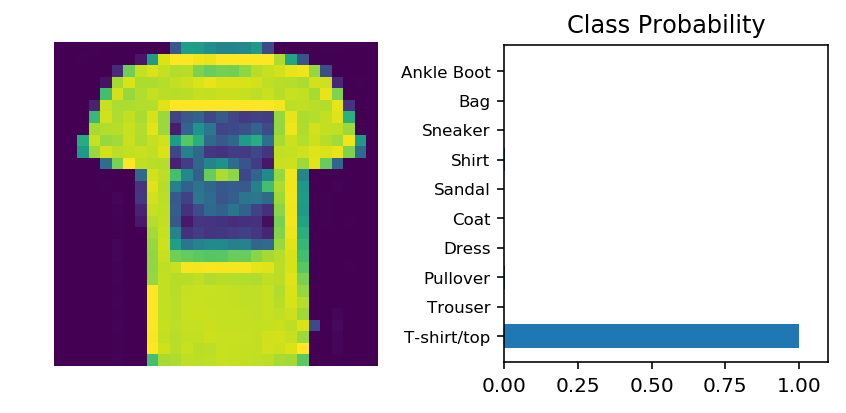

In [77]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
lab = labels[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)
print(output) #this output is the result of nn.LogSoftmax

ps = torch.exp(output) 
print(ps)
print(lab)
# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')